# se dara un primer vistaso al comportamiento de las varibales

In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# datos

## explicacion base de datos

In [278]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [279]:
dfp=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfclean')
dfp.head()

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,balcon,...,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,codigo departamento,codigo municipio,departamento,tipo vivienda
0,0,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,1380000000,32000.0,5.0,6.0,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
1,1,https://www.fincaraiz.com.co/vivari-de-san-nic...,VIVARI DE SAN NICOLAS San Nicolás - Rionegro,496122600,91972.0,3.0,3.0,1,"6234794 Vivari San Nicolás, es un conjunto res...",1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
2,1,https://www.fincaraiz.com.co/altos-de-santana/...,ALTOS DE SANTANA Oriente Antioqueño - Rionegro,360002000,73372.0,3.0,3.0,0,6351568 Proyecto de apartamentos de 2 y 3 habi...,0.0,...,0.0,1.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
3,0,https://www.fincaraiz.com.co/casa-en-venta/rio...,Casa en Venta Rionegro Llano Grande,1350000000,28200.0,4.0,5.0,4,Casa en venta en exclusiva unidad cerrada en ...,1.0,...,0.0,1.0,0.0,1.0,1.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
4,0,https://www.fincaraiz.com.co/casa-en-venta/rio...,Casa en Venta Rionegro El Porvenir,950000000,23000.0,3.0,3.0,2,Hermosa casa de 3 niveles en Venta en Lotus Ex...,0.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio


In [280]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tipo                      1857 non-null   int64  
 1   url                       1857 non-null   object 
 2   titulo                    1857 non-null   object 
 3   precio                    1857 non-null   int64  
 4   area                      1857 non-null   float64
 5   habitaciones              1857 non-null   float64
 6   banos                     1857 non-null   float64
 7   garajes                   1857 non-null   int64  
 8   descripcion               1857 non-null   object 
 9   balcon                    1857 non-null   float64
 10  trasn. publico            1857 non-null   float64
 11  estrato                   1857 non-null   float64
 12  antiguedad                1857 non-null   float64
 13  cocina                    1857 non-null   float64
 14  bano aux

In [281]:
dfp.describe(exclude=[object])

,tipo,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,codigo departamento,codigo municipio
count,1857.000000,1.857000e+03,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,...,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.0,1857.000000
mean,0.019925,6.682182e+08,13892.789871,3.159935,2.846527,1.496500,0.537964,0.590738,4.047927,1.702746,...,0.461497,0.390953,0.422186,0.335487,0.380183,0.426494,0.525040,0.363489,5.0,5573.589661
std,0.139779,5.087969e+08,16965.416990,1.180731,1.271636,1.830098,0.498691,0.491830,0.900411,1.379873,...,0.498650,0.488095,0.494041,0.472288,0.485562,0.494701,0.499507,0.481134,0.0,98.970866
min,0.000000,9.500000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,5001.000000
25%,0.000000,3.100000e+08,5600.000000,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,5607.000000
50%,0.000000,4.500000e+08,7900.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.0,5615.000000
75%,0.000000,8.800000e+08,18300.000000,4.000000,4.000000,2.000000,1.000000,1.000000,5.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.0,5615.000000
max,1.000000,2.300000e+09,173002.000000,12.000000,12.000000,11.000000,1.000000,1.000000,6.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.0,5615.000000


# analisis general

In [282]:
# 3 cassa mas costosas
dfp.nlargest(columns='precio',n=3)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,balcon,...,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,codigo departamento,codigo municipio,departamento,tipo vivienda
5,0,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Llanogrande,2300000000,1.500,4.0,3.0,3,Casa campestre que goza de una ubicación privi...,0.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
140,0,https://www.fincaraiz.com.co/casa-en-venta/rio...,Casa en Venta Rionegro Llano Grande,2300000000,38000.000,6.0,8.0,5,Casa finca para la venta en el municipio de Ri...,1.0,...,0.0,1.0,0.0,1.0,1.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
409,0,https://www.fincaraiz.com.co/casa-en-venta/rio...,Casa en Venta Rionegro Rionegro,2300000000,3.043,3.0,3.0,2,"Hermosa casa moderna en venta en Rionegro, An...",0.0,...,1.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio


In [283]:
# 3 cassa mas baratas
dfp.nsmallest(columns='precio',n=3)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,balcon,...,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,codigo departamento,codigo municipio,departamento,tipo vivienda
1710,0,https://www.fincaraiz.com.co/apartaestudio-en-...,Apartaestudio en Venta Guarne Punto Mayor Mall,95000000,2400.0,1.0,1.0,0,Se Vende Confortable aparta oficina ubicada fr...,0.0,...,0.0,0.0,1.0,0.0,0.0,GUARNE,5,5318.0,ANTIOQUIA,Municipio
1583,0,https://www.fincaraiz.com.co/apartamento-en-ve...,Apartamento en Venta Marinilla Villas del Ensueño,100000000,4800.0,3.0,1.0,0,Apartamento Ubicado en la Urbanización Villas ...,0.0,...,0.0,1.0,1.0,1.0,0.0,MARINILLA,5,5440.0,ANTIOQUIA,Municipio
56,0,https://www.fincaraiz.com.co/casa-en-venta/rio...,Casa en Venta Rionegro Quebrada arriba,120000000,4300.0,1.0,1.0,0,"Casa de 2 Apartaestudios muy iluminados, prime...",0.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio


### moda

In [284]:
nocolumns = ['tipo','url','titulo','precio','area','descripcion','codigo departamento','codigo municipio']
colummoda = [col for col in dfp.columns if col not in nocolumns]
dfp[colummoda].mode()

,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,cocina,bano aux,zona lavanderia,...,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,departamento,tipo vivienda
0,3.0,2.0,1,1.0,1.0,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,RIONEGRO,ANTIOQUIA,Municipio


### kurtosis y asimetria 

In [285]:
dfp['precio'].kurt() , dfp['area'].kurt()

(1.0538300240830885, 23.748122616984553)

<AxesSubplot:xlabel='area', ylabel='Density'>

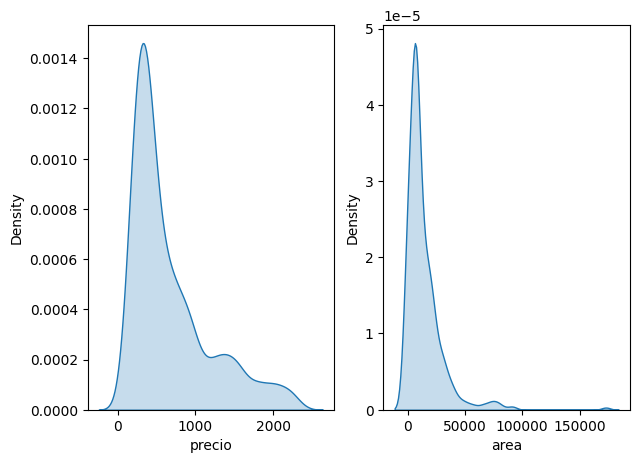

In [299]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,5))
sns.kdeplot(dfp.precio/1000000, shade=True, ax=ax[0])
sns.kdeplot(dfp.area,shade=True,ax = ax[1])

tanto con los valores de la curtosis como las graficas de distribucion podemos observar que para la variables precios su distribucion  indica una distribución levemente puntiaguda. Esto significa que la distribución tiene una cantidad moderada de valores extremos y tambien se peude decri que sus valores se concentran al lado izqueirdo de la media

Por otro lado apra la variable area se note una kurtosis mucho mas eleveda  lo que sugiere una gran cantidad de valores extremos y tambien como es positivia se observa una concentracion de los datos a la izquierda de la media

In [300]:
dfp['precio'].skew() , dfp['area'].skew()

(1.362101316922665, 3.7621021126001275)

el valor de asimetría de 1.362101316922665 indica que la distribución está sesgada hacia la derecha, lo que sugiere que hay una concentración de valores más pequeños en la cola izquierda de la distribución y una cola más larga en la dirección de los valores más grandes

Por otro lado, el valor de asimetría de 3.7621021126001275 indica una fuerte asimetría hacia la derecha, lo que sugiere que la concentración de valores más pequeños en la cola izquierda es mucho mayor y que hay una cola aún más larga en la dirección de los valores más grandes que en el precio

### desviacion estandar y varianza

In [301]:
dfp.std()

C:\Users\Juan Guzman\AppData\Local\Temp\ipykernel_2024\1115086866.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfp.std()


tipo                        1.397789e-01
precio                      5.087969e+08
area                        1.696542e+04
habitaciones                1.180731e+00
banos                       1.271636e+00
garajes                     1.830098e+00
balcon                      4.986909e-01
trasn. publico              4.918302e-01
estrato                     9.004113e-01
antiguedad                  1.379873e+00
cocina                      4.685965e-01
bano aux                    4.982043e-01
zona lavanderia             4.984785e-01
zonas verdes                4.986496e-01
supermercado o cc           4.880954e-01
instalacion de gas          4.940410e-01
parqueadero visitantes      4.722877e-01
colegios / universidades    4.855624e-01
parques cercanos            4.947006e-01
zona residencial            4.995071e-01
closet                      4.811336e-01
codigo departamento         0.000000e+00
codigo municipio            9.897087e+01
dtype: float64

In [303]:
dfp.var()

C:\Users\Juan Guzman\AppData\Local\Temp\ipykernel_2024\3500786514.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfp.var()


tipo                        1.953814e-02
precio                      2.588743e+17
area                        2.878254e+08
habitaciones                1.394127e+00
banos                       1.617058e+00
garajes                     3.349260e+00
balcon                      2.486926e-01
trasn. publico              2.418969e-01
estrato                     8.107406e-01
antiguedad                  1.904050e+00
cocina                      2.195827e-01
bano aux                    2.482075e-01
zona lavanderia             2.484808e-01
zonas verdes                2.486514e-01
supermercado o cc           2.382371e-01
instalacion de gas          2.440765e-01
parqueadero visitantes      2.230557e-01
colegios / universidades    2.357709e-01
parques cercanos            2.447287e-01
zona residencial            2.495073e-01
closet                      2.314895e-01
codigo departamento         0.000000e+00
codigo municipio            9.795232e+03
dtype: float64

<AxesSubplot:>

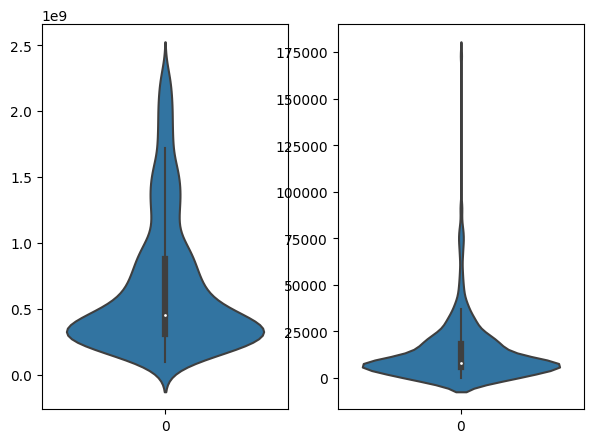

In [314]:
fig, ax = plt.subplots(ncols=2,figsize=(7,5)) 
sns.violinplot(data=dfp['precio'],ax=ax[0])
sns.violinplot(data=dfp['area'],ax=ax[1])

### observacion de grupos

In [319]:
dfp.groupby('municipio').mean()

,tipo,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,codigo departamento,codigo municipio
municipio,,,,,,,,,,,,,,,,,,,,,
ALEJANDRÍA,0.000000,2.300000e+08,10100.000000,3.666667,2.333333,0.666667,0.333333,0.666667,3.000000,1.000000,...,0.333333,0.333333,0.666667,0.666667,0.333333,0.000000,0.666667,0.333333,5.0,5021.0
BELLO,0.000000,1.800000e+08,6000.000000,2.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.0,5088.0
BETANIA,0.000000,8.500000e+08,3.166667,4.666667,3.666667,1.333333,0.666667,0.666667,3.000000,1.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,5.0,5091.0
GUARNE,0.000000,7.529345e+08,9090.312130,3.815217,2.956522,2.673913,0.413043,0.527174,3.266304,2.092391,...,0.304348,0.119565,0.081522,0.163043,0.081522,0.260870,0.195652,0.244565,5.0,5318.0
MARINILLA,0.047619,4.404631e+08,14264.673024,3.166667,2.380952,1.559524,0.500000,0.547619,3.154762,1.738095,...,0.309524,0.238095,0.238095,0.238095,0.250000,0.285714,0.321429,0.250000,5.0,5440.0
MEDELLÍN,0.000000,1.200000e+09,50000.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,5001.0
RETIRO,0.018325,8.989204e+08,15772.243073,3.002618,3.078534,1.680628,0.541885,0.560209,4.539267,1.643979,...,0.497382,0.350785,0.382199,0.342932,0.311518,0.479058,0.568063,0.376963,5.0,5607.0
RIONEGRO,0.021685,5.982775e+08,14025.650101,3.104254,2.791493,1.257715,0.559633,0.613011,4.080901,1.660550,...,0.487073,0.457882,0.500417,0.366972,0.457882,0.446205,0.577148,0.386989,5.0,5615.0


In [323]:
# observar el municipio con la vivienda mas cara
dfp.groupby('municipio').max('precio')

,tipo,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,codigo departamento,codigo municipio
municipio,,,,,,,,,,,,,,,,,,,,,
ALEJANDRÍA,0,330000000,16200.0,4.0,3.0,1,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,5,5021.0
BELLO,0,180000000,6000.0,2.0,1.0,0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5,5088.0
BETANIA,0,980000000,4.0,6.0,4.0,2,1.0,1.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5091.0
GUARNE,0,2200000000,60000.0,9.0,9.0,11,1.0,1.0,5.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,5318.0
MARINILLA,1,1800000000,80000.0,9.0,7.0,11,1.0,1.0,4.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,5440.0
MEDELLÍN,0,1200000000,50000.0,4.0,0.0,0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5001.0
RETIRO,1,2300000000,90000.0,6.0,8.0,11,1.0,1.0,6.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,5607.0
RIONEGRO,1,2300000000,173002.0,12.0,12.0,11,1.0,1.0,6.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,5615.0


### multivariada

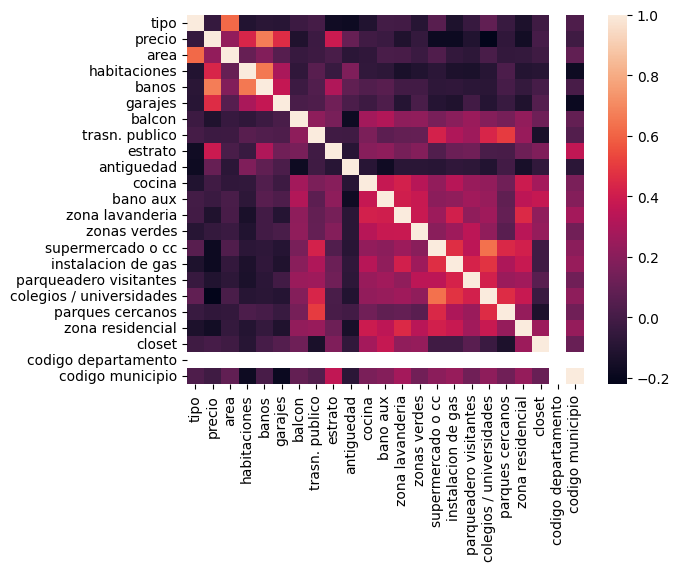

In [327]:

sns.heatmap(dfp.corr());